# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#build query url with necessary parameters
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&"#q={city}"

#append these lists from responses to build the dataframe
cities_=[]
country=[]
latitudes=[]
longitudes=[]
date=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]

#printing out record process
city_record = 1
city_set = 1
print('Beginning Data Retrieval')
print('------------------------')


for city in cities:
    city_weather = requests.get(f'{query_url}q={city}').json()
    
    #when looking at the responses it looks like its all or nothing, if the city is found, all the data is there
    #if city isn't there then we get code other than 200
    if city_weather['cod'] == 200:
        
        print(f'Processing Record {city_record} of Set {city_set} | {city}')
        city_record+=1
        
        #appending the selected data from each response
        cities_.append(city_weather['name']) #cities
        country.append(city_weather['sys']['country']) #country
        latitudes.append(city_weather['coord']['lat']) #lats
        longitudes.append(city_weather['coord']['lon']) #lats
        date.append(city_weather['dt']) #date
        max_temp.append(city_weather['main']['temp_max'])#max temp
        humidity.append(city_weather['main']['humidity'])#humidity
        cloudiness.append(city_weather['clouds']['all']) #cloudiness
        wind_speed.append(city_weather['wind']['speed']) #wind speed
             
    else:
        print("City not found. Skipping...")
        
    #print(city_weather)
    if city_record == 51:
        city_record = 1
        city_set +=1

print('------------------------')
print('Data Retrieval Complete')


#[City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max Temp, Wind Speed]

# Get weather data
#weather_response = requests.get(query_url)
#weather_json = weather_response.json()
#api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={your api key}


Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | nizhniy kuranakh
Processing Record 3 of Set 1 | kapaa
City not found. Skipping...
Processing Record 4 of Set 1 | malanje
City not found. Skipping...
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | norman wells
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | port lincoln
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | college
City not found. Skipping...
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | ketchikan
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | la ronge
Processing Record 16 of Set 1 | digby
Processing Record 17 of Set 1 | great yarmouth
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | lata
City not found. Skipping...
Processing Record 20 of Set 1 | kaitangata
Processing Re

Processing Record 31 of Set 4 | porto walter
Processing Record 32 of Set 4 | phan thiet
Processing Record 33 of Set 4 | ucluelet
Processing Record 34 of Set 4 | natal
Processing Record 35 of Set 4 | fortuna
Processing Record 36 of Set 4 | ahipara
Processing Record 37 of Set 4 | noumea
Processing Record 38 of Set 4 | cairns
Processing Record 39 of Set 4 | samarai
Processing Record 40 of Set 4 | cherskiy
Processing Record 41 of Set 4 | sturgeon falls
Processing Record 42 of Set 4 | carnarvon
City not found. Skipping...
Processing Record 43 of Set 4 | husavik
Processing Record 44 of Set 4 | haines junction
Processing Record 45 of Set 4 | grass valley
Processing Record 46 of Set 4 | nikolskoye
Processing Record 47 of Set 4 | mangrol
City not found. Skipping...
Processing Record 48 of Set 4 | tasiilaq
Processing Record 49 of Set 4 | constitucion
Processing Record 50 of Set 4 | lamu
Processing Record 1 of Set 5 | carutapera
Processing Record 2 of Set 5 | kilindoni
Processing Record 3 of Set 

Processing Record 15 of Set 8 | san patricio
Processing Record 16 of Set 8 | adrar
Processing Record 17 of Set 8 | barra patuca
Processing Record 18 of Set 8 | annau
Processing Record 19 of Set 8 | flinders
Processing Record 20 of Set 8 | rio gallegos
Processing Record 21 of Set 8 | buin
Processing Record 22 of Set 8 | paraiso
Processing Record 23 of Set 8 | asau
Processing Record 24 of Set 8 | portland
Processing Record 25 of Set 8 | westport
Processing Record 26 of Set 8 | cansancao
Processing Record 27 of Set 8 | cape coast
Processing Record 28 of Set 8 | oranjestad
Processing Record 29 of Set 8 | xining
Processing Record 30 of Set 8 | dawlatabad
Processing Record 31 of Set 8 | kangaatsiaq
Processing Record 32 of Set 8 | san juan
Processing Record 33 of Set 8 | padang
Processing Record 34 of Set 8 | tuatapere
Processing Record 35 of Set 8 | chitral
Processing Record 36 of Set 8 | karlstad
Processing Record 37 of Set 8 | sao joao da barra
Processing Record 38 of Set 8 | mananara
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create df
city_weather_df=pd.DataFrame({
    'City':cities_,
    'Country':country,
    'Lat':latitudes,
    'Long':longitudes,
    'Date':date,
    'Max Temp': max_temp,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speed})
#make sure we have enough cities
city_weather_df.count()

City          544
Country       544
Lat           544
Long          544
Date          544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
dtype: int64

In [5]:
#export our df to csv
city_weather_df.to_csv(r'..\output_data\weather_dataframe.csv')
city_weather_df.head()

,City,Country,Lat,Long,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,3.07,172.79,1592425905,82.67,76,1,13.35
1,Nizhniy Kuranakh,RU,58.84,125.49,1592425905,59.49,79,53,2.33
2,Kapaa,US,22.08,-159.32,1592425905,80.60,74,75,14.99
3,Malanje,AO,-9.54,16.34,1592425905,60.57,44,0,2.98
4,Airai,TL,-8.93,125.41,1592425905,55.26,100,29,4.72


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

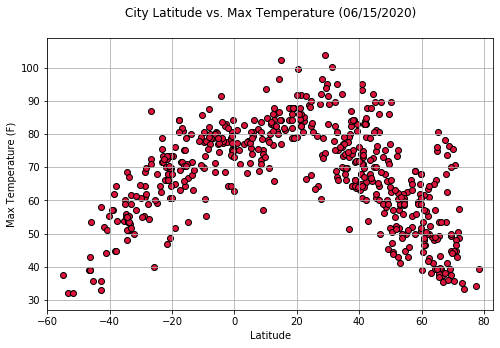

In [6]:
#get the date from the timestamp
#only need one timestamp
timestamp=city_weather_df['Date'][0]
#use this to formate to month-day-year
date=datetime.fromtimestamp(1592278986).strftime('%m/%d/%Y')

#print(datetime.fromtimestamp(1592278986).strftime('%m/%d/%Y %H:%M:%S'))

#setting variables for plot from the df
lats_x = city_weather_df.iloc[:, 2]
temps_y = city_weather_df.iloc[:, 5]


#scatterplot formatting
plt.figure(figsize=(8,5))
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.ylim((round(temps_y.min()-5),(round(temps_y.max())+5)))
plt.xlim((round(lats_x.min()-5),(round(lats_x.max())+5)))
plt.title(f'City Latitude vs. Max Temperature ({date})\n')
plt.scatter(x=lats_x,y=temps_y,color='crimson',edgecolor='black')
#save the plot
plt.savefig("../output_data/lat_temp.png")
plt.show()
#summary
print('')

Here the code is creating a plot where each marker represents a city and is plotted against its max temperature and its latitude. 

#### Latitude vs. Humidity Plot

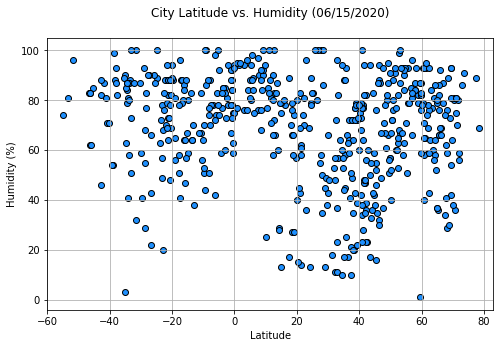

In [7]:
humidity_y = city_weather_df.iloc[:, 6]

#scatterplot formatting
plt.figure(figsize=(8,5))
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim((round(humidity_y.min()-5),(round(humidity_y.max())+5)))
plt.xlim((round(lats_x.min()-5),(round(lats_x.max())+5)))
plt.title(f'City Latitude vs. Humidity ({date})\n')
plt.scatter(x=lats_x,y=humidity_y,color='dodgerblue',edgecolor='black')
plt.savefig("../output_data/lat_hum.png")
plt.show()

Simliar to before, the code creates a plot but this time the cities (markers) are plotted against humidity and latitude.

#### Latitude vs. Cloudiness Plot

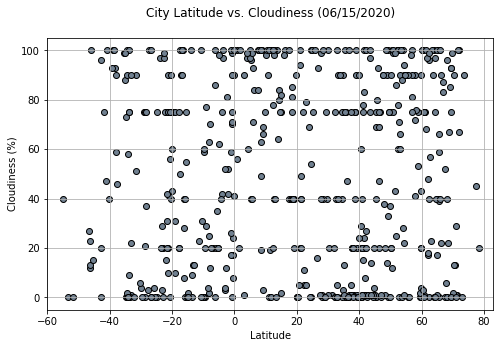

In [8]:
cloud_y = city_weather_df.iloc[:, 7]

#scatterplot formatting
plt.figure(figsize=(8,5))
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim((round(cloud_y.min()-5),(round(cloud_y.max())+5)))
plt.xlim((round(lats_x.min()-5),(round(lats_x.max())+5)))
plt.title(f'City Latitude vs. Cloudiness ({date})\n')
plt.scatter(x=lats_x,y=cloud_y,color='slategrey',edgecolor='black')

plt.savefig("../output_data/lat_cloud.png")
plt.show()


This time the cities (markers) are plotted against cloudiness and latitude.

#### Latitude vs. Wind Speed Plot

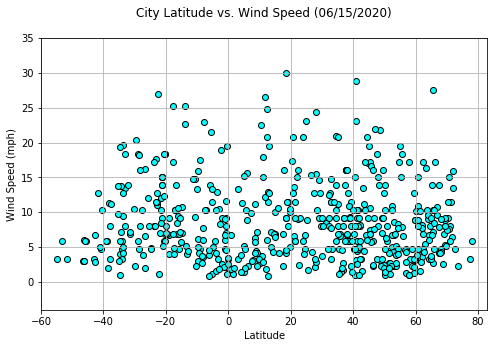

In [9]:
cloud_y = city_weather_df.iloc[:, 8]

#scatterplot formatting
plt.figure(figsize=(8,5))
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim((round(cloud_y.min()-5),(round(cloud_y.max())+5)))
plt.xlim((round(lats_x.min()-5),(round(lats_x.max())+5)))
plt.title(f'City Latitude vs. Wind Speed ({date})\n')
plt.scatter(x=lats_x,y=cloud_y,color='cyan',edgecolor='black')

plt.savefig("../output_data/lat_wind.png")
plt.show()

Lastly the cities are plotted against latitude and the wind speed.

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(xvalues,yvalues,xlabel,ylabel,hemisphere,unit):
    #(slope,int, r, p, std_err) from linregress
    lin = linregress(xvalues,yvalues)
    regressline=np.arange(xvalues.min(),xvalues.max()+2,2)
    line = regressline*lin[0] + lin[1]
    #string presenting equation
    eq = f"y = {round(lin[0],2)}x+{round(lin[1],2)}"
    #scatterplot formatting
    plt.figure(figsize=(10,7))
    plt.xlabel(xlabel)
    plt.ylabel(f'{ylabel} ({unit})')
    plt.xlim((round(xvalues.min()-5),(round(xvalues.max())+5)))
    plt.ylim((round(yvalues.min()-5),(round(yvalues.max())+5)))
    plt.title(f'{hemisphere} Hemisphere\n{ylabel} vs {xlabel}\n({date})')

    markercolor = 'dodgerblue'

    plt.scatter(x=xvalues,y=yvalues,color=markercolor,edgecolor='black')
   

#plotting linear regression line with equation annotations 
    plt.plot(regressline,line,"r--")
    plt.savefig(f"../output_data/{hemisphere}_{ylabel.replace(' ','_')}.png")
    plt.show()

#printing out the linear regression results
    print(f'{hemisphere} Hemisphere\n{ylabel} vs {xlabel}\nLinear Regression Model:')
    print(f'\n{eq}\nx = {xlabel}\ny = {ylabel} ({unit})')
    print(f'Correlation Coefficient(R) = {round(lin[2],3)}')
    print(f'R-squared = {round(lin[2]**2,3)}')

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_weather_df.loc[(city_weather_df['Lat'] >= 0),:]
southern_df = city_weather_df.loc[(city_weather_df['Lat'] <= 0),:]
#northern_df

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

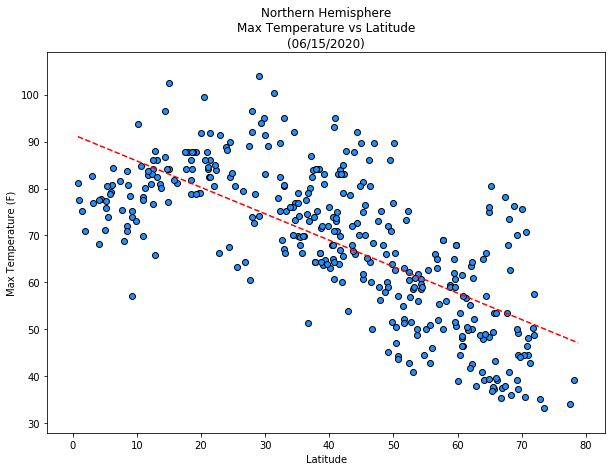

Northern Hemisphere
Max Temperature vs Latitude
Linear Regression Model:

y = -0.56x+91.5
x = Latitude
y = Max Temperature (F)
Correlation Coefficient(R) = -0.705
R-squared = 0.497


In [12]:
#linear_regression(xvalues,yvalues,xlabel,ylabel,hemisphere,unit)
north_lats = northern_df.iloc[:, 2]
north_temps = northern_df.iloc[:, 5]
linear_regression(north_lats,north_temps,'Latitude','Max Temperature','Northern','F')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

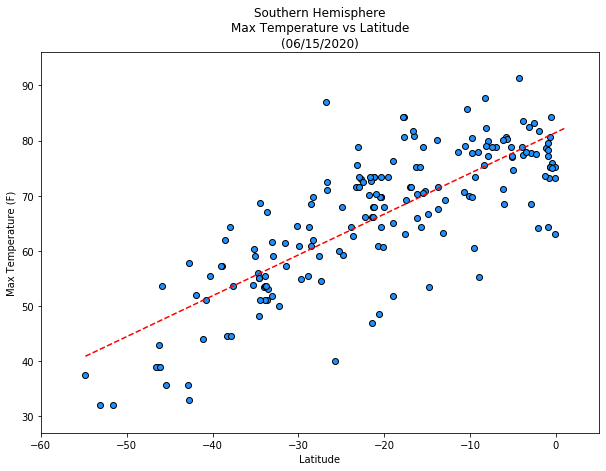

Southern Hemisphere
Max Temperature vs Latitude
Linear Regression Model:

y = 0.74x+81.46
x = Latitude
y = Max Temperature (F)
Correlation Coefficient(R) = 0.793
R-squared = 0.63


In [13]:
south_lats = southern_df.iloc[:, 2]
south_temps = southern_df.iloc[:, 5]
linear_regression(south_lats,south_temps,'Latitude','Max Temperature','Southern','F')

Somewhat common knowledge is that the weather closer to the equator (0 latitude) is generally hotter and as you move away it gets cooler. Just observing the scatter pattern we see that this trend is confirmed. The linear regressions |R| values for both plots are greater than .7 also indicating a strong correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

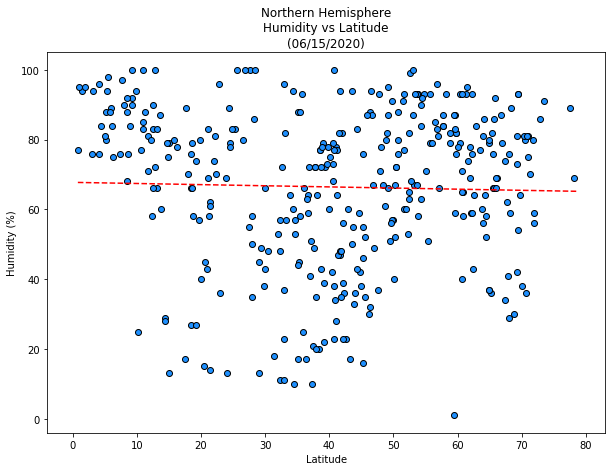

Northern Hemisphere
Humidity vs Latitude
Linear Regression Model:

y = -0.03x+67.74
x = Latitude
y = Humidity (%)
Correlation Coefficient(R) = -0.028
R-squared = 0.001


In [14]:
north_hum=northern_df.iloc[:, 6]
linear_regression(north_lats,north_hum,'Latitude','Humidity','Northern','%')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

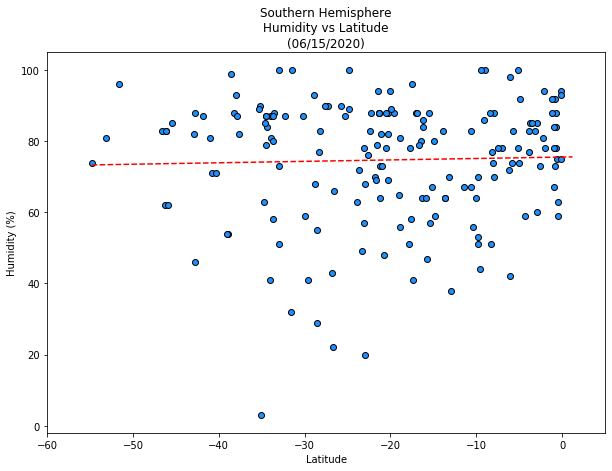

Southern Hemisphere
Humidity vs Latitude
Linear Regression Model:

y = 0.04x+75.54
x = Latitude
y = Humidity (%)
Correlation Coefficient(R) = 0.032
R-squared = 0.001


In [15]:
south_hum=southern_df.iloc[:, 6]
linear_regression(south_lats,south_hum,'Latitude','Humidity','Southern','%')

Based on the linear regression model there doesn't seem to be any correlation between latitude and humidity. However we do observe that at the cities located right at or very close to the equator are concentrated in higher humidity levels but also among all the cities, the humidiy levels seem to be concentrated above the 60% humidity mark.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

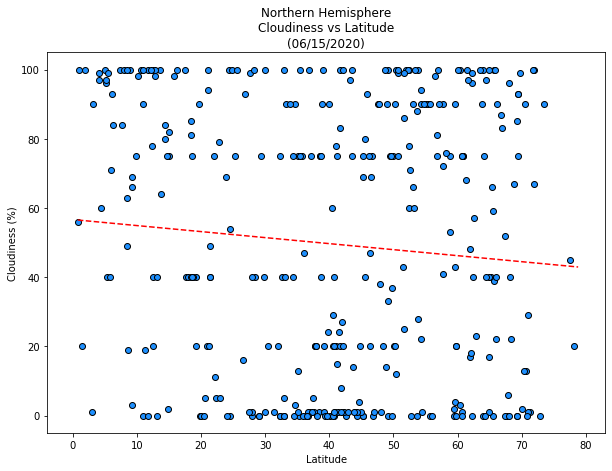

Northern Hemisphere
Cloudiness vs Latitude
Linear Regression Model:

y = -0.17x+56.64
x = Latitude
y = Cloudiness (%)
Correlation Coefficient(R) = -0.088
R-squared = 0.008


In [16]:
north_clouds=northern_df.iloc[:, 7]
linear_regression(north_lats,north_clouds,'Latitude','Cloudiness','Northern','%')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

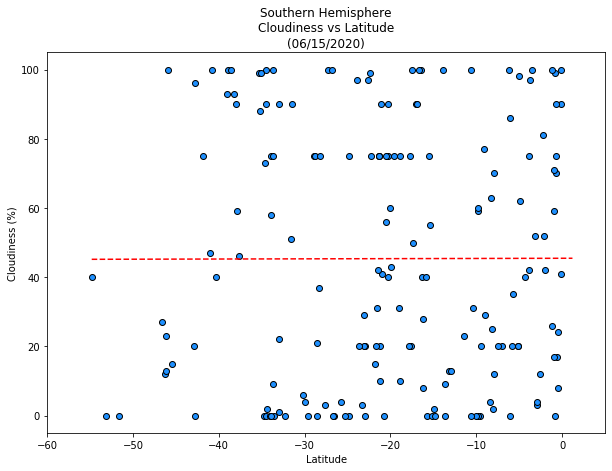

Southern Hemisphere
Cloudiness vs Latitude
Linear Regression Model:

y = 0.01x+45.45
x = Latitude
y = Cloudiness (%)
Correlation Coefficient(R) = 0.002
R-squared = 0.0


In [17]:
south_clouds=southern_df.iloc[:, 7]
linear_regression(south_lats,south_clouds,'Latitude','Cloudiness','Southern','%')

Again there doesn't seem to be a trend based on the linear regression. We see a wide range of cloudiness levels across a wide range latitudes. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

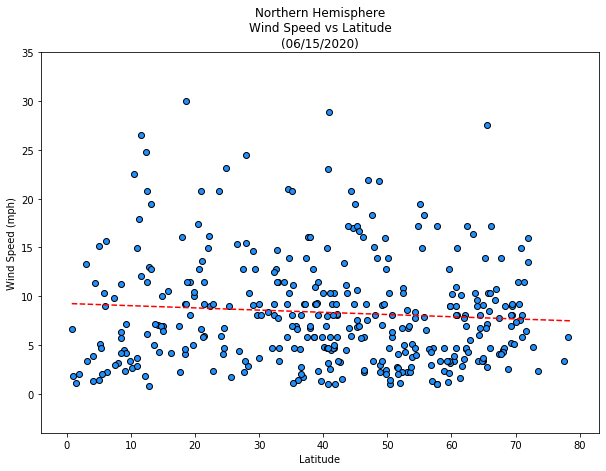

Northern Hemisphere
Wind Speed vs Latitude
Linear Regression Model:

y = -0.02x+9.26
x = Latitude
y = Wind Speed (mph)
Correlation Coefficient(R) = -0.08
R-squared = 0.006


In [18]:
north_winds=northern_df.iloc[:, 8]
linear_regression(north_lats,north_winds,'Latitude','Wind Speed','Northern','mph')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

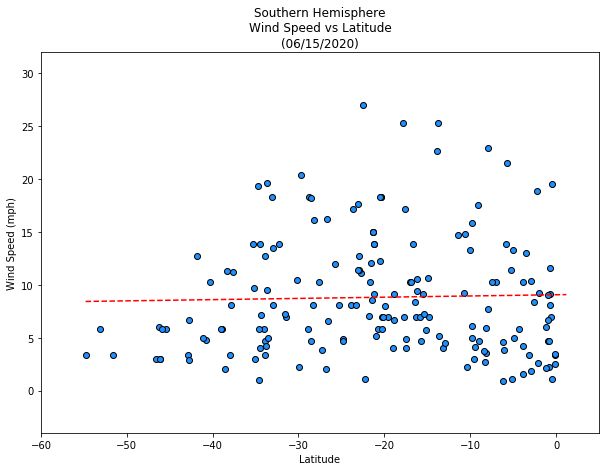

Southern Hemisphere
Wind Speed vs Latitude
Linear Regression Model:

y = 0.01x+9.06
x = Latitude
y = Wind Speed (mph)
Correlation Coefficient(R) = 0.028
R-squared = 0.001


In [19]:
south_winds=southern_df.iloc[:, 8]
linear_regression(south_lats,south_winds,'Latitude','Wind Speed','Southern','mph')

Again based on the linear regression there doesn't seem to be a trend between latitudes and wind speed. As we would expect, most of the wind speeds are located below 20 mph. We do see a few cities with much higher wind speeds and one in particular around 34 mph (dangerous!), which could be attibuted to a storm or some other abnormal weather occurance.